In [1230]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

In [1231]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


# 1, 데이터 기본 정보 확인

In [1232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [1233]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- age(연속) : 연령
- sex : 성별(0,1)_(0: 여자, 1:남자)
- cp : 흉통 유형 (0,1,2,3)_(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- trestbps(연속) : 휴식 혈압
- chol(연속) : 혈청 cholestoral (mg / dl)
- fbs : 공복 혈당(0,1)_(> 120 mg/dl, 1 = true; 0 = false)
- restecg : 휴식 심전도 결과(0,1,2)_( (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach(연속) : 최대 심박수 달성
- exang : 운동 유발 협심증(0,1)_(1 = yes; 0 = no)
- oldpeak(연속) : 휴식과 관련하여 운동에 의해 유발 된 ST 우울증
- slope : 피크 운동의 기울기 ST 세그먼트(0,1,2)_(1: upsloping, 2: flat, 3: downsloping)
- ca : The number of major vessels (0,1,2,3,4)
- thal : thalassemia라고 불리는 혈액 질환 (0,1,2,3)_(3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [1234]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 2, 그래프

## - 범주형 column에 대한 데이터

In [1235]:
df.groupby('sex').target.mean()

sex
0    0.724359
1    0.420757
Name: target, dtype: float64

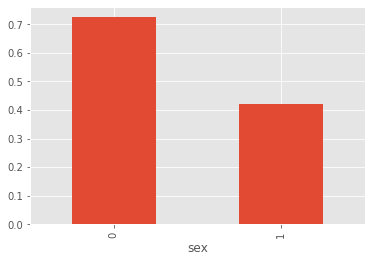

In [1236]:
df.groupby('sex').target.mean().plot.bar()

=> 여자가 심장병에 걸릴 확률이 더 높음

In [1237]:
df.groupby('cp').target.mean()

cp
0    0.245473
1    0.802395
2    0.771127
3    0.662338
Name: target, dtype: float64

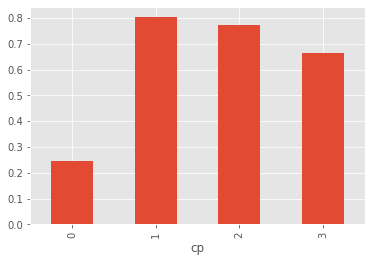

In [1238]:
df.groupby('cp').target.mean().plot.bar()

In [1239]:
df.groupby('fbs').target.mean()

fbs
0    0.521789
1    0.464052
Name: target, dtype: float64

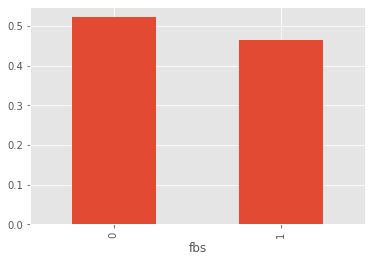

In [1240]:
df.groupby('fbs').target.mean().plot.bar()

In [1241]:
df.groupby('restecg').target.mean()

restecg
0    0.430584
1    0.602339
2    0.200000
Name: target, dtype: float64

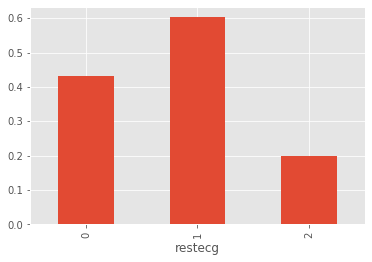

In [1242]:
df.groupby('restecg').target.mean().plot.bar()

In [1243]:
df.groupby('exang').target.mean()

exang
0    0.669118
1    0.205797
Name: target, dtype: float64

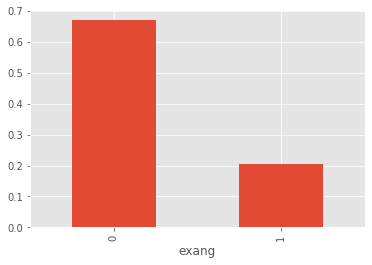

In [1244]:
df.groupby('exang').target.mean().plot.bar()

In [1245]:
df.groupby('slope').target.mean()

slope
0    0.378378
1    0.327801
2    0.724947
Name: target, dtype: float64

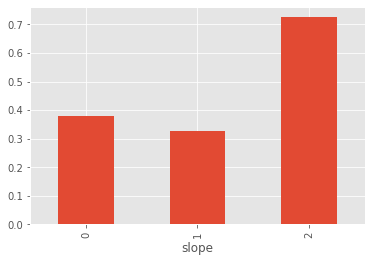

In [1246]:
df.groupby('slope').target.mean().plot.bar()

In [1247]:
df.groupby('ca').target.mean()

ca
0    0.717993
1    0.292035
2    0.156716
3    0.130435
4    0.833333
Name: target, dtype: float64

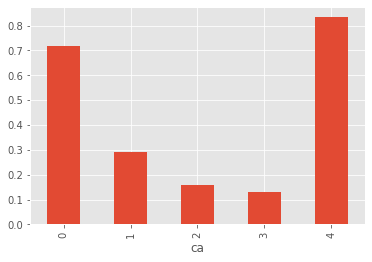

In [1248]:
df.groupby('ca').target.mean().plot.bar()

In [1249]:
df.groupby('thal').target.mean()

thal
0    0.428571
1    0.328125
2    0.757353
3    0.219512
Name: target, dtype: float64

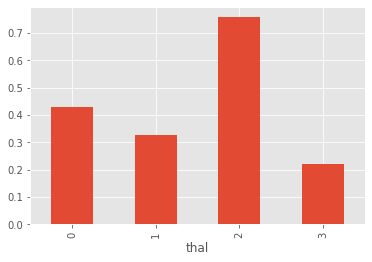

In [1250]:
df.groupby('thal').target.mean().plot.bar()

## - 연속형 column에 대한 데이터

In [1251]:
def draw_facetgrid(feature):
    facet = sns.FacetGrid(df, hue="target", aspect=5) # Multi-plot grid for plotting conditional relationships.
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, df[feature].max()))
    
    facet.add_legend() 
    plt.show()

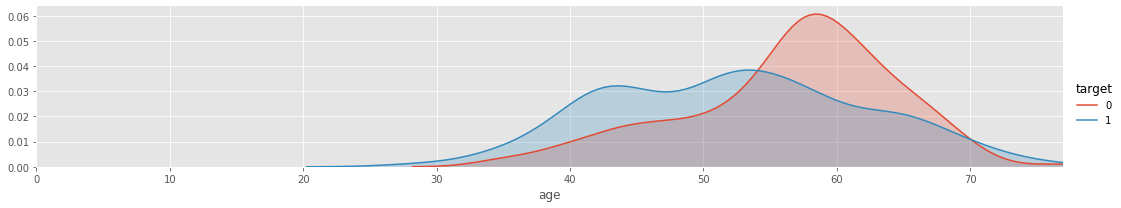

In [1252]:
draw_facetgrid("age")

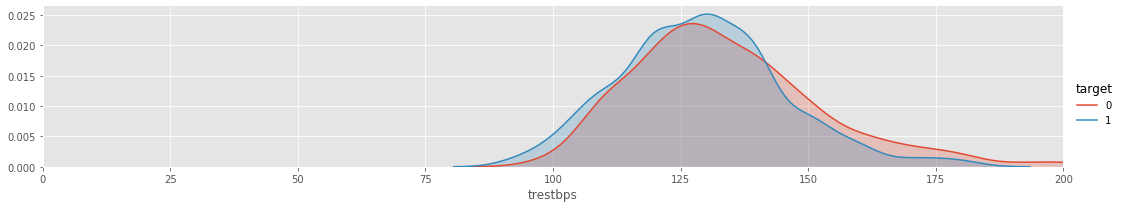

In [1253]:
draw_facetgrid("trestbps")

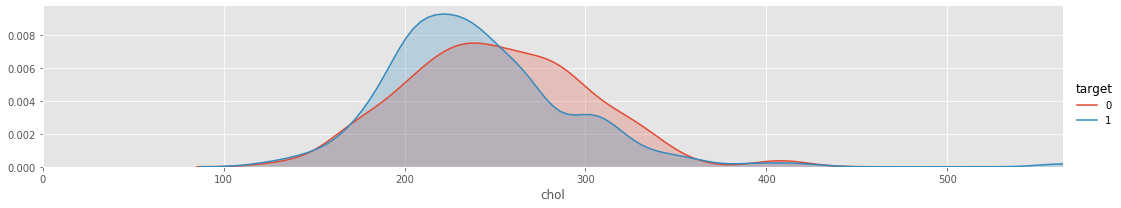

In [1254]:
draw_facetgrid("chol")

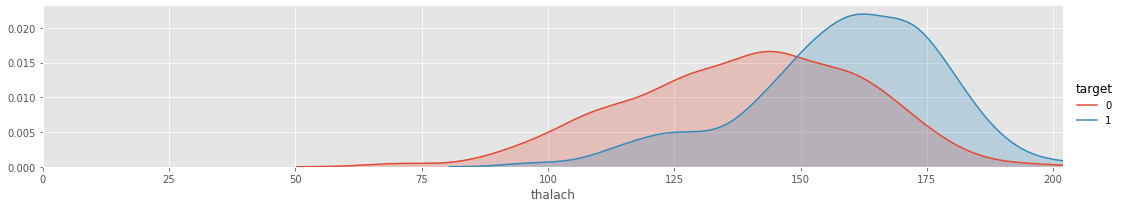

In [1255]:
draw_facetgrid("thalach")

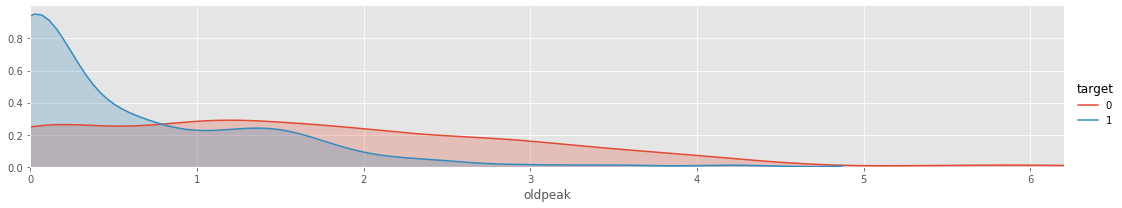

In [1256]:
draw_facetgrid("oldpeak")

# 3, 연속형 -> 범주형으로 바꾸기

연속 값 : age,trestbps, chol, thalach, oldpeak

In [1257]:
df[['age','trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


age

In [1258]:
bins = [0,29,48,56,61,78]
labels = [0,1,2,3,4]
cats_a = pd.cut(df.age, bins, labels=labels)

In [1259]:
df1 = pd.DataFrame(df[["age"]], columns=["age"])
df1["age_cat"] = cats_a
df1.head()

,age,age_cat
0,52,2
1,53,2
2,70,4
3,61,3
4,62,4


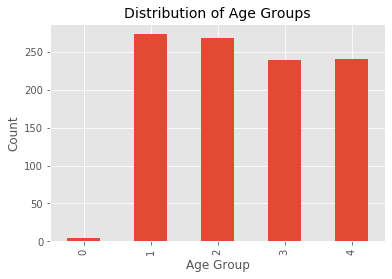

In [1260]:
df1.groupby(['age_cat']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [1261]:
df["age"] = df1[["age_cat"]]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,2,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,4,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,0,0,138,294,1,1,106,0,1.9,1,3,2,0


trestbps

In [1262]:
bins = [0,94,120,130,140,201]
labels = [0,1,2,3,4]
cats_trestbps = pd.cut(df.trestbps, bins, labels=labels)

In [1263]:
df2 = pd.DataFrame(df[["trestbps"]], columns=["trestbps"])
df2["trestbps_cat"] = cats_trestbps
df2.head()

,trestbps,trestbps_cat
0,125,2
1,140,3
2,145,4
3,148,4
4,138,3


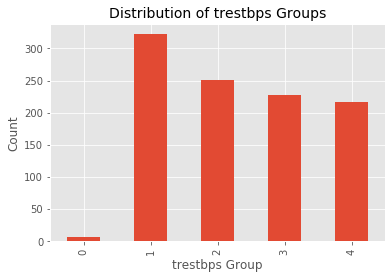

In [1264]:
df2.groupby(['trestbps_cat']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of trestbps Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('trestbps Group');

In [1265]:
df['trestbps'] = cats_trestbps

chol

In [1266]:
bins = [0,126,211,240,275,564]
labels = [0,1,2,3,4]
cats_chol = pd.cut(df.chol, bins, labels=labels)

In [1267]:
df3 = pd.DataFrame(df[["chol"]], columns=["chol"])
df3["chol_cat"] = cats_chol
df3.head()

,chol,chol_cat
0,212,2
1,203,1
2,174,1
3,203,1
4,294,4


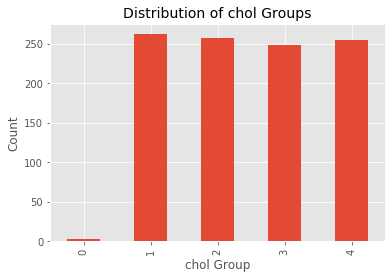

In [1268]:
df3.groupby(['chol_cat']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of chol Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('chol Group');

In [1269]:
df['chol'] = cats_chol

thalach

In [1270]:
bins = [0,71,132,152,166,202]
labels = [0,1,2,3,4]
cats_thalach = pd.cut(df.thalach, bins, labels=labels)

In [1271]:
df4 = pd.DataFrame(df[["thalach"]], columns=["thalach"])
df4["thalach_cat"] = cats_thalach
df4.head()

,thalach,thalach_cat
0,168,4
1,155,3
2,125,1
3,161,3
4,106,1


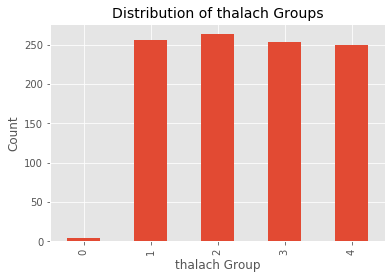

In [1272]:
df4.groupby(['thalach_cat']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of thalach Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('thalach Group');

In [1273]:
df['thalach'] = cats_thalach

oldpeak

In [1274]:
bins = [-2,0.8,1.8,6.2]
labels = [0,1,2]
cats_oldpeak = pd.cut(df.oldpeak, bins, labels=labels)

In [1275]:
df5 = pd.DataFrame(df[["oldpeak"]], columns=["oldpeak"])
df5["oldpeak_cat"] = cats_oldpeak
df5.head()

,oldpeak,oldpeak_cat
0,1.0,1
1,3.1,2
2,2.6,2
3,0.0,0
4,1.9,2


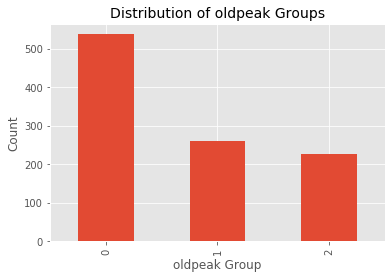

In [1276]:
df5.groupby(['oldpeak_cat']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of oldpeak Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('oldpeak Group');

In [1277]:
df['oldpeak'] = cats_oldpeak

In [1278]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,2,2,0,1,4,0,1,2,2,3,0
1,2,1,0,3,1,1,0,3,1,2,0,0,3,0
2,4,1,0,4,1,0,1,1,1,2,0,0,3,0
3,3,1,0,4,1,0,1,3,0,0,2,1,3,0
4,4,0,0,3,4,1,1,1,0,2,1,3,2,0
5,3,0,0,1,3,0,0,1,0,1,1,0,2,1
6,3,1,0,1,4,0,2,2,0,2,0,3,1,0
7,2,1,0,4,4,0,0,2,1,0,1,1,3,0
8,1,1,0,1,3,0,0,2,0,0,2,0,3,0
9,2,1,0,2,4,0,0,1,1,2,1,2,2,0


# 4, 상관관계

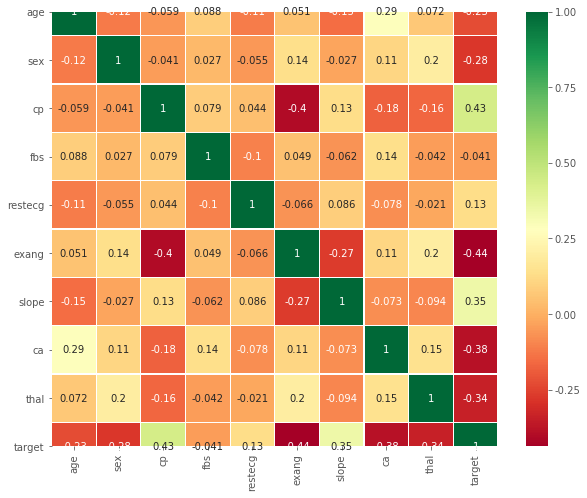

In [1279]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- target과 양의 상관계수 Top2 : cp(0.43), slope(0.35)
- target과 음의 상관계수 Top2 : exang(-0.44), ca(-0.38)

# 5, 모델 학습(머신러닝)

x_data, y_data 나누기

In [1280]:
x_data = df.drop(['target'], axis=1)
y_data = df[['target']]

Train - Test split

In [1281]:
# 행렬로

In [1282]:
x_data = np.array(x_data)
y_target = np.array(y_data)

In [1283]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_target, test_size=0.3, random_state=0)

In [1284]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 13)
(308, 13)
(717, 1)
(308, 1)


In [1285]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [1286]:
# Support Vector Machines

svc = SVC(kernel='rbf', probability=True)
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test) 
# pred_test = svc.predict_proba(x_test, probability=True)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

91.63

In [1287]:
from sklearn import metrics

acc_svc = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)
acc_svc

91.23

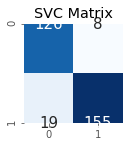

In [1288]:
from sklearn.metrics import confusion_matrix

Y_pred = svc.predict(x_test)

cm_svc = confusion_matrix(Y_pred, y_test)
plt.subplot(2,3,3)
plt.title("SVC Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

In [1289]:
# knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
# pred_test = knn.predict_proba(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

99.02

In [1290]:
from sklearn import metrics

acc_knn = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)
acc_knn

95.13

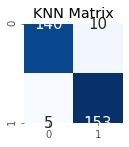

In [1291]:
cm_knn = confusion_matrix(Y_pred, y_test)
plt.subplot(2,3,3)
plt.title("KNN Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

In [1292]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
# pred_test = gaussian.predict_proba(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

81.03

In [1293]:
from sklearn import metrics

acc_gaussian = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)
acc_gaussian

83.44

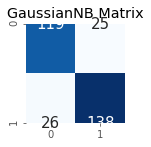

In [1294]:
cm_gaussian = confusion_matrix(Y_pred, y_test)
plt.subplot(2,3,3)
plt.title("GaussianNB Matrix")
sns.heatmap(cm_gaussian,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

In [1295]:
# Logistic Regression

logistic = linear_model.LogisticRegression()
logistic.fit(x_train, y_train)
Y_pred = logistic.predict(x_test)
pred_test = logistic.predict_proba(x_test)
acc_log = round(logistic.score(x_train, y_train) * 100, 2)
acc_log

83.68

In [1296]:
from sklearn import metrics

acc_log = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)
acc_log

88.31

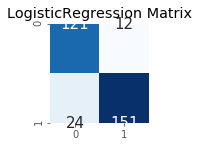

In [1297]:
cm_LogisticRegression = confusion_matrix(Y_pred, y_test)
plt.subplot(2,3,3)
plt.title("LogisticRegression Matrix")
sns.heatmap(cm_LogisticRegression,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

In [1298]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

83.26

In [1299]:
from sklearn import metrics

acc_linear_svc = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)
acc_linear_svc

86.69

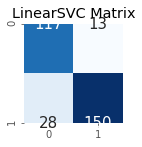

In [1300]:
cm_LinearSVC = confusion_matrix(Y_pred, y_test)
plt.subplot(2,3,3)
plt.title("LinearSVC Matrix")
sns.heatmap(cm_LinearSVC,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

In [1301]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
pred_test = logistic.predict_proba(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [1302]:
from sklearn import metrics

acc_decision_tree = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)
acc_decision_tree

100.0

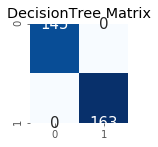

In [1303]:
cm_DecisionTree = confusion_matrix(Y_pred, y_test)
plt.subplot(2,3,3)
plt.title("DecisionTree Matrix")
sns.heatmap(cm_DecisionTree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

In [1304]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
pred_test = logistic.predict_proba(x_test)
#random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

In [1305]:
from sklearn import metrics

acc_random_forest = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)
acc_random_forest

100.0

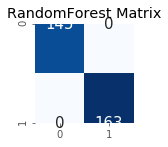

In [1306]:
cm_RandomForest = confusion_matrix(Y_pred, y_test)
plt.subplot(2,3,3)
plt.title("RandomForest Matrix")
sns.heatmap(cm_RandomForest,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

In [1307]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
            acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
1,KNN,95.13
0,Support Vector Machines,91.23
2,Logistic Regression,88.31
5,Linear SVC,86.69
4,Naive Bayes,83.44


# 6, 모델 학습(딥러닝)

one-hot

In [1308]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')

enc.fit(y_train)
y_train = enc.transform(y_train).toarray()

enc.fit(y_test)
y_test = enc.transform(y_test).toarray()

print(y_train.shape)
print(y_test.shape)

(717, 2)
(308, 2)


In [1309]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [1310]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=13, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))   # 매 layer에 넣을 필요 없음. 마지막 layer에만 이렇게 넣으면 된다.

model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

In [1311]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [1312]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.3) 

Train on 501 samples, validate on 216 samples
Epoch 1/20
501/501 [==============================] - 1s 2ms/sample - loss: 2.1860 - categorical_accuracy: 0.6188 - val_loss: 2.0924 - val_categorical_accuracy: 0.7222
Epoch 2/20
501/501 [==============================] - 0s 92us/sample - loss: 1.4977 - categorical_accuracy: 0.7046 - val_loss: 0.7279 - val_categorical_accuracy: 0.7870
Epoch 3/20
501/501 [==============================] - 0s 92us/sample - loss: 0.8152 - categorical_accuracy: 0.7804 - val_loss: 0.5897 - val_categorical_accuracy: 0.7731
Epoch 4/20
501/501 [==============================] - 0s 94us/sample - loss: 0.5872 - categorical_accuracy: 0.8104 - val_loss: 0.5528 - val_categorical_accuracy: 0.7963
Epoch 5/20
501/501 [==============================] - 0s 94us/sample - loss: 0.6564 - categorical_accuracy: 0.7824 - val_loss: 0.5516 - val_categorical_accuracy: 0.7824
Epoch 6/20
501/501 [==============================] - 0s 90us/sample - loss: 0.6903 - categorical_accuracy: 0.

In [1313]:
# history = model.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=0.0) 

In [1314]:
result = model.evaluate(x_test, y_test, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

308/308 [==============================] - 0s 36us/sample - loss: 0.3188 - categorical_accuracy: 0.8701
loss (cross-entropy) : 0.3187633330945845
test accuracy : 0.8701299
